## PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Set up the environment
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [4]:
# Load and inspect the data
df = pd.read_csv(r"https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/wine.csv")
print(df.describe())
print(df.head())
print(df.info())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

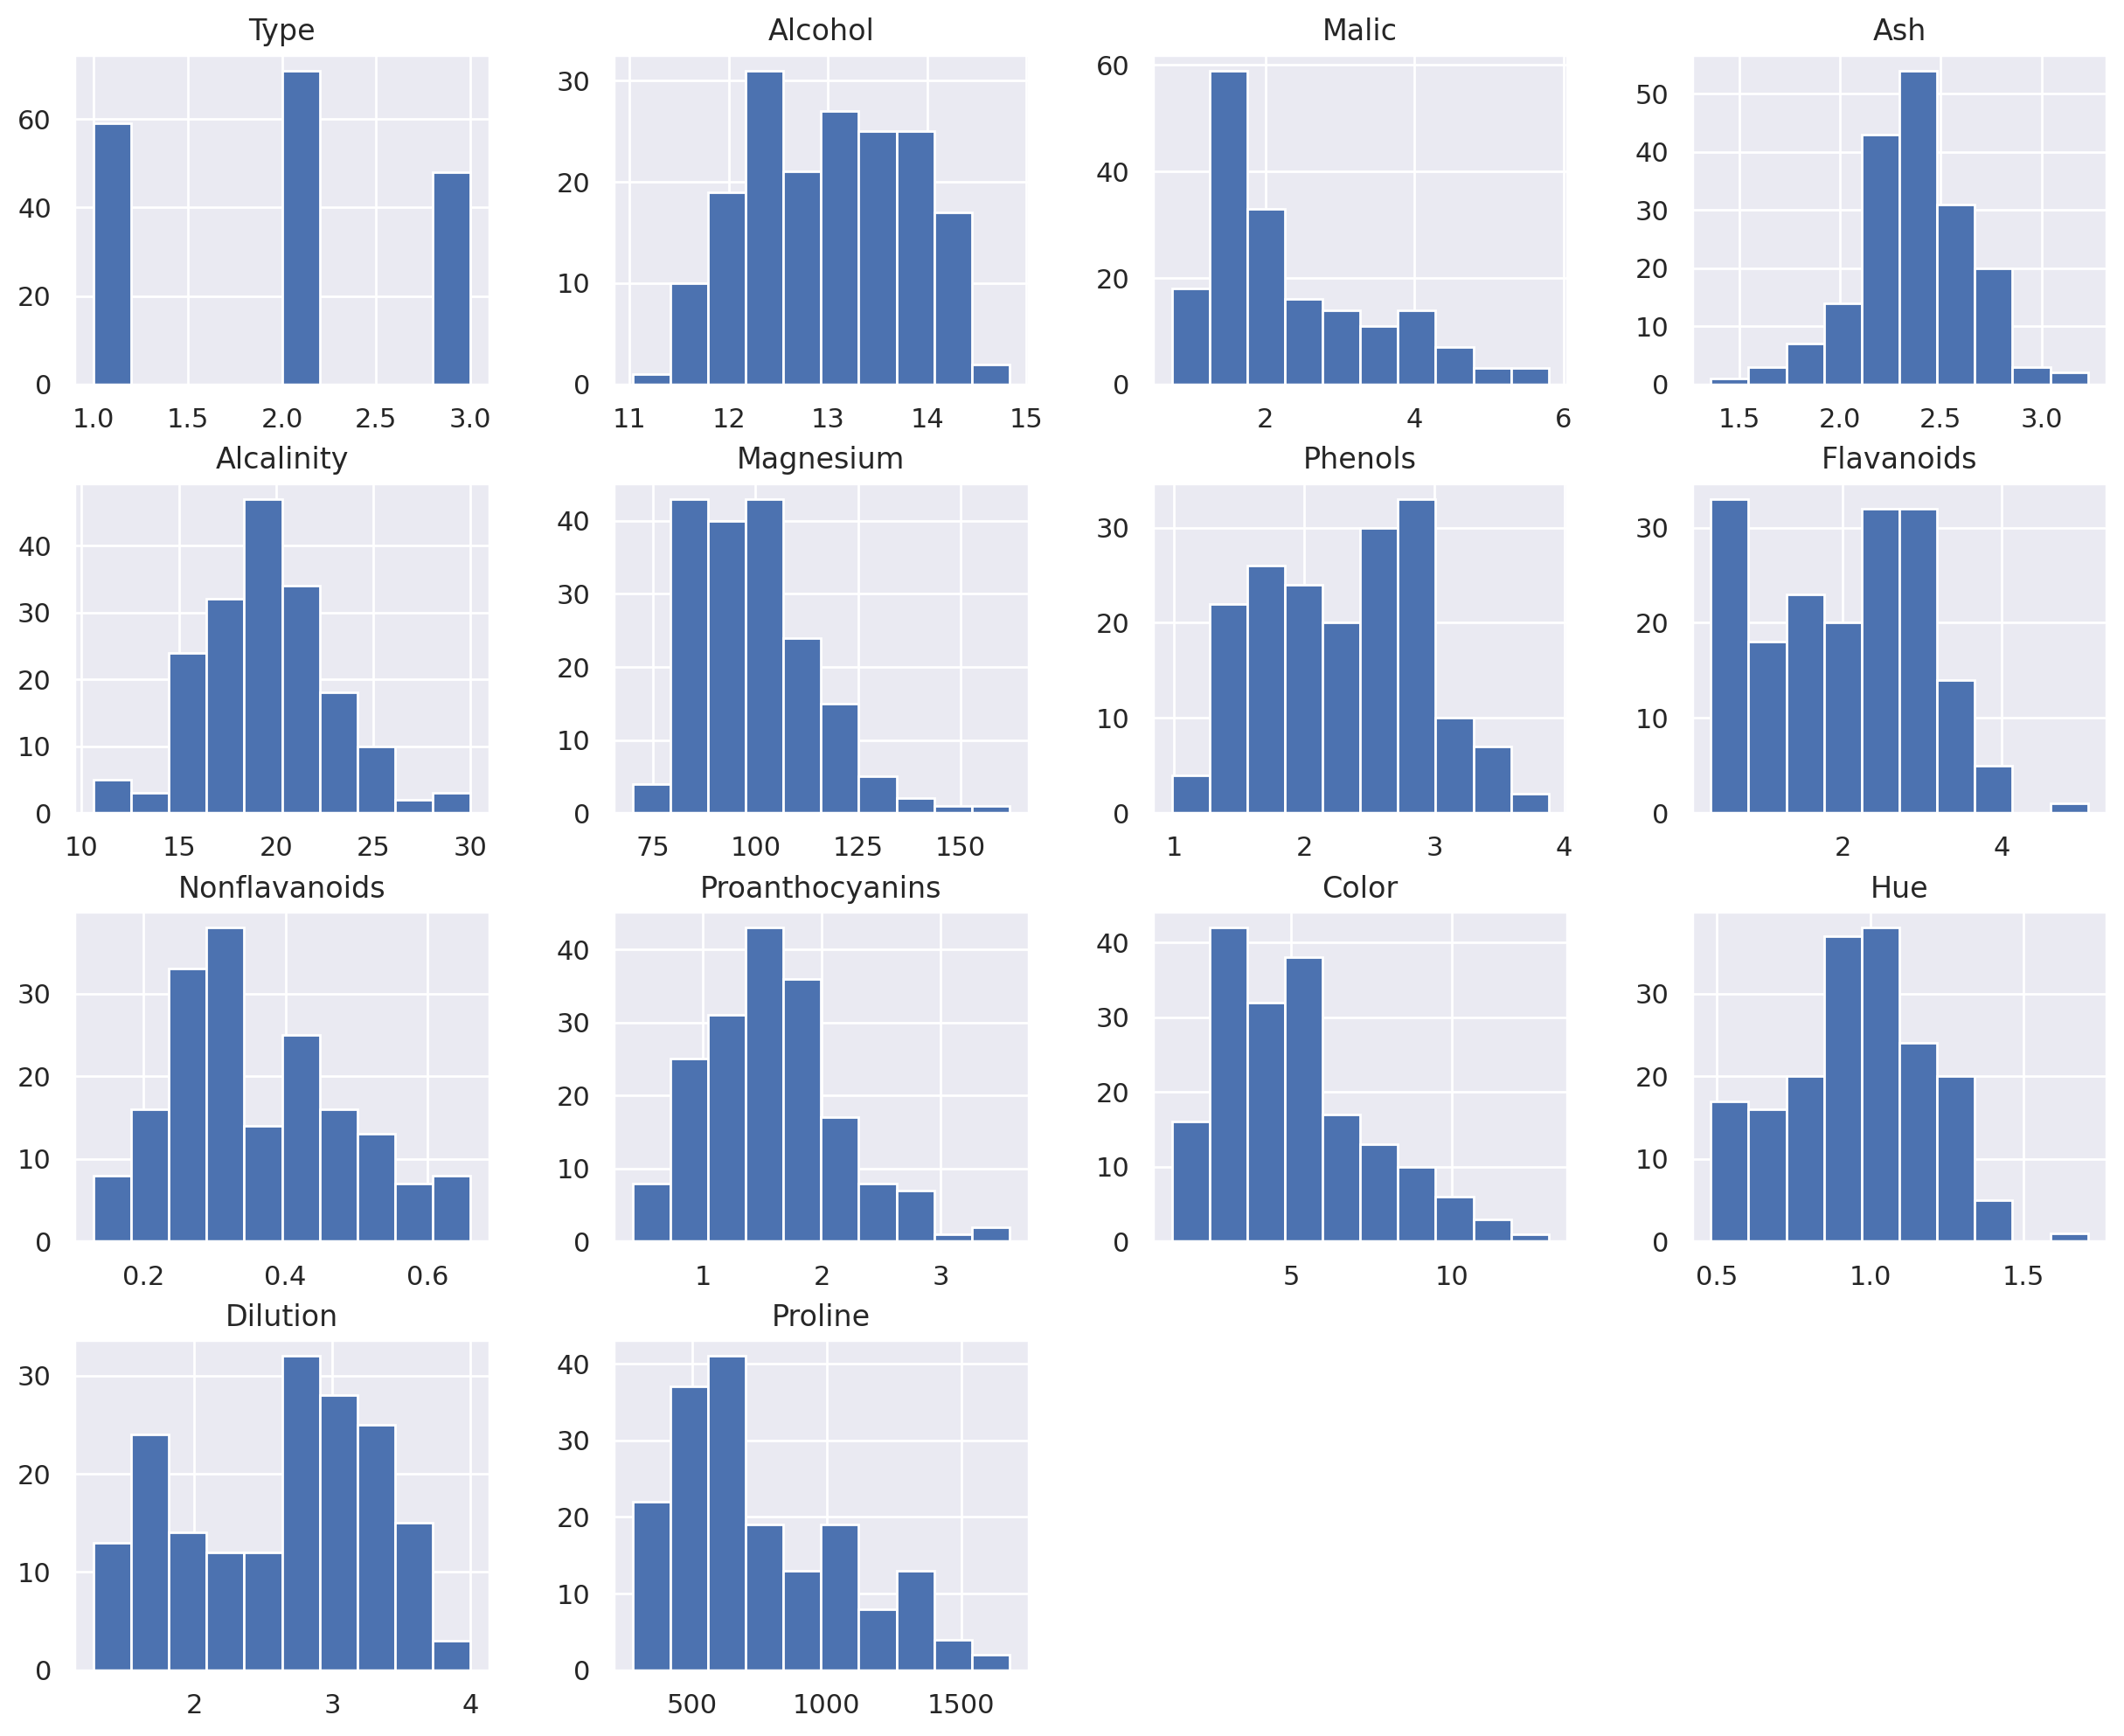

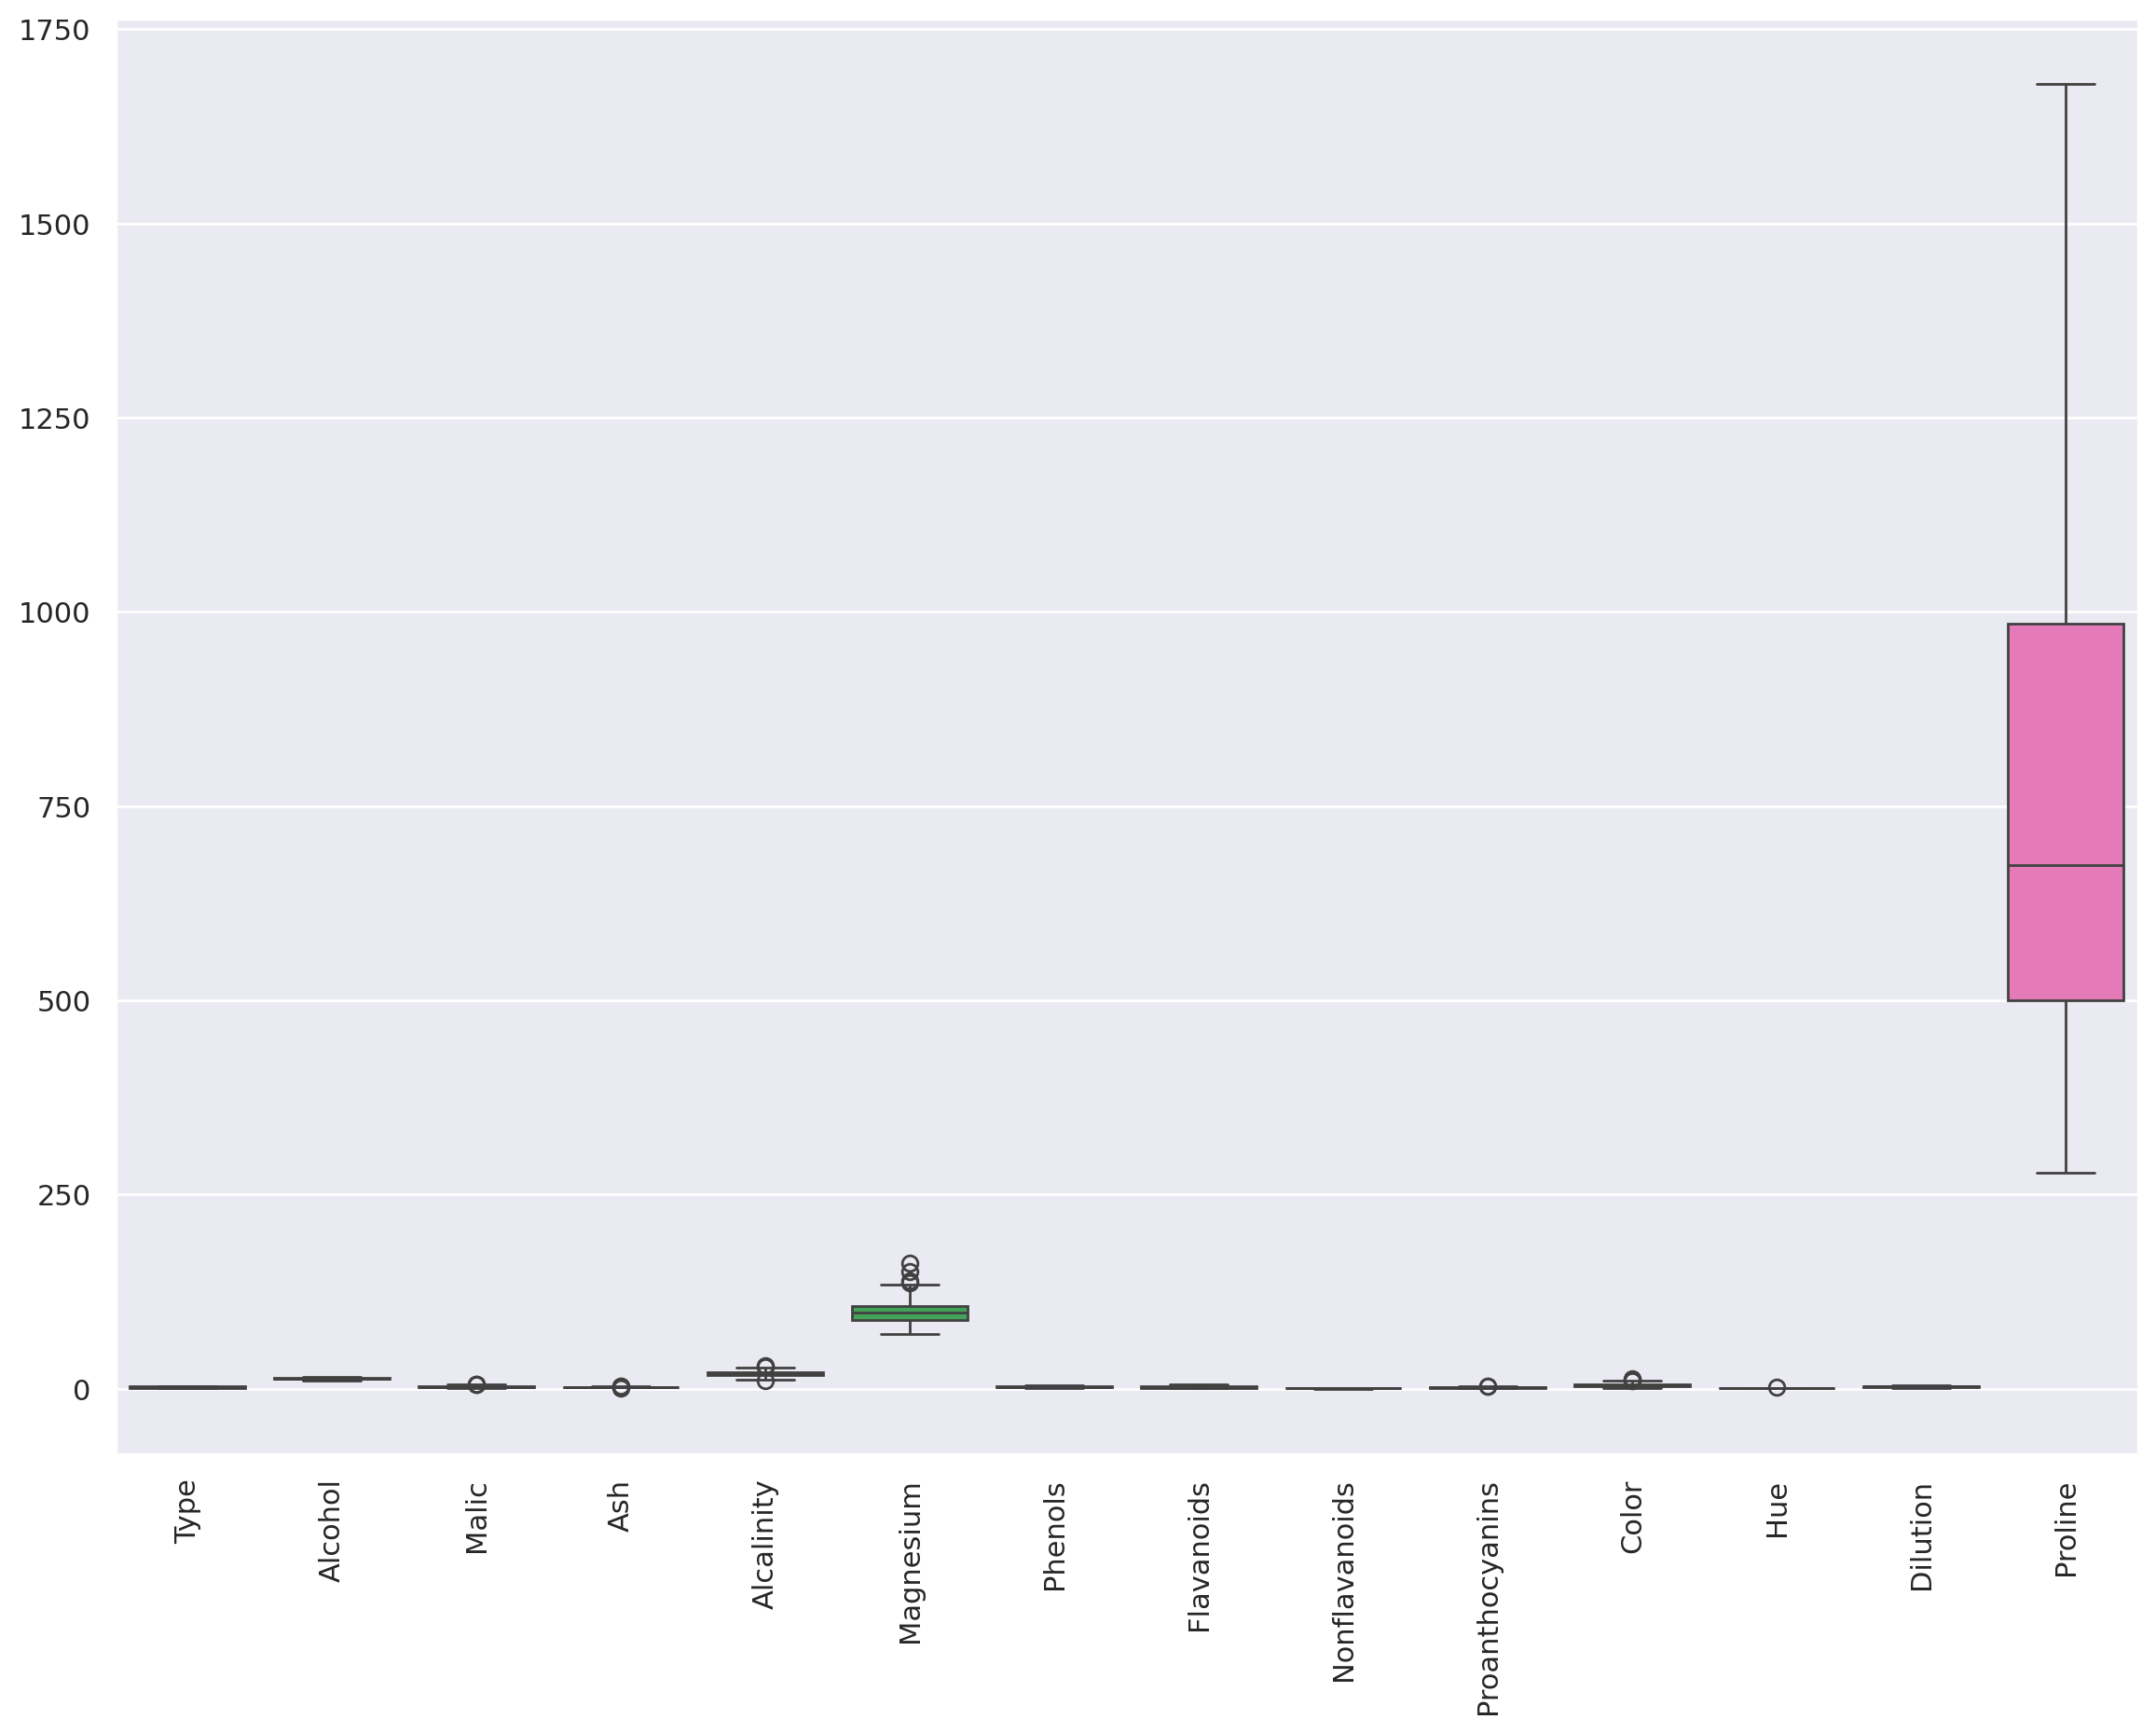

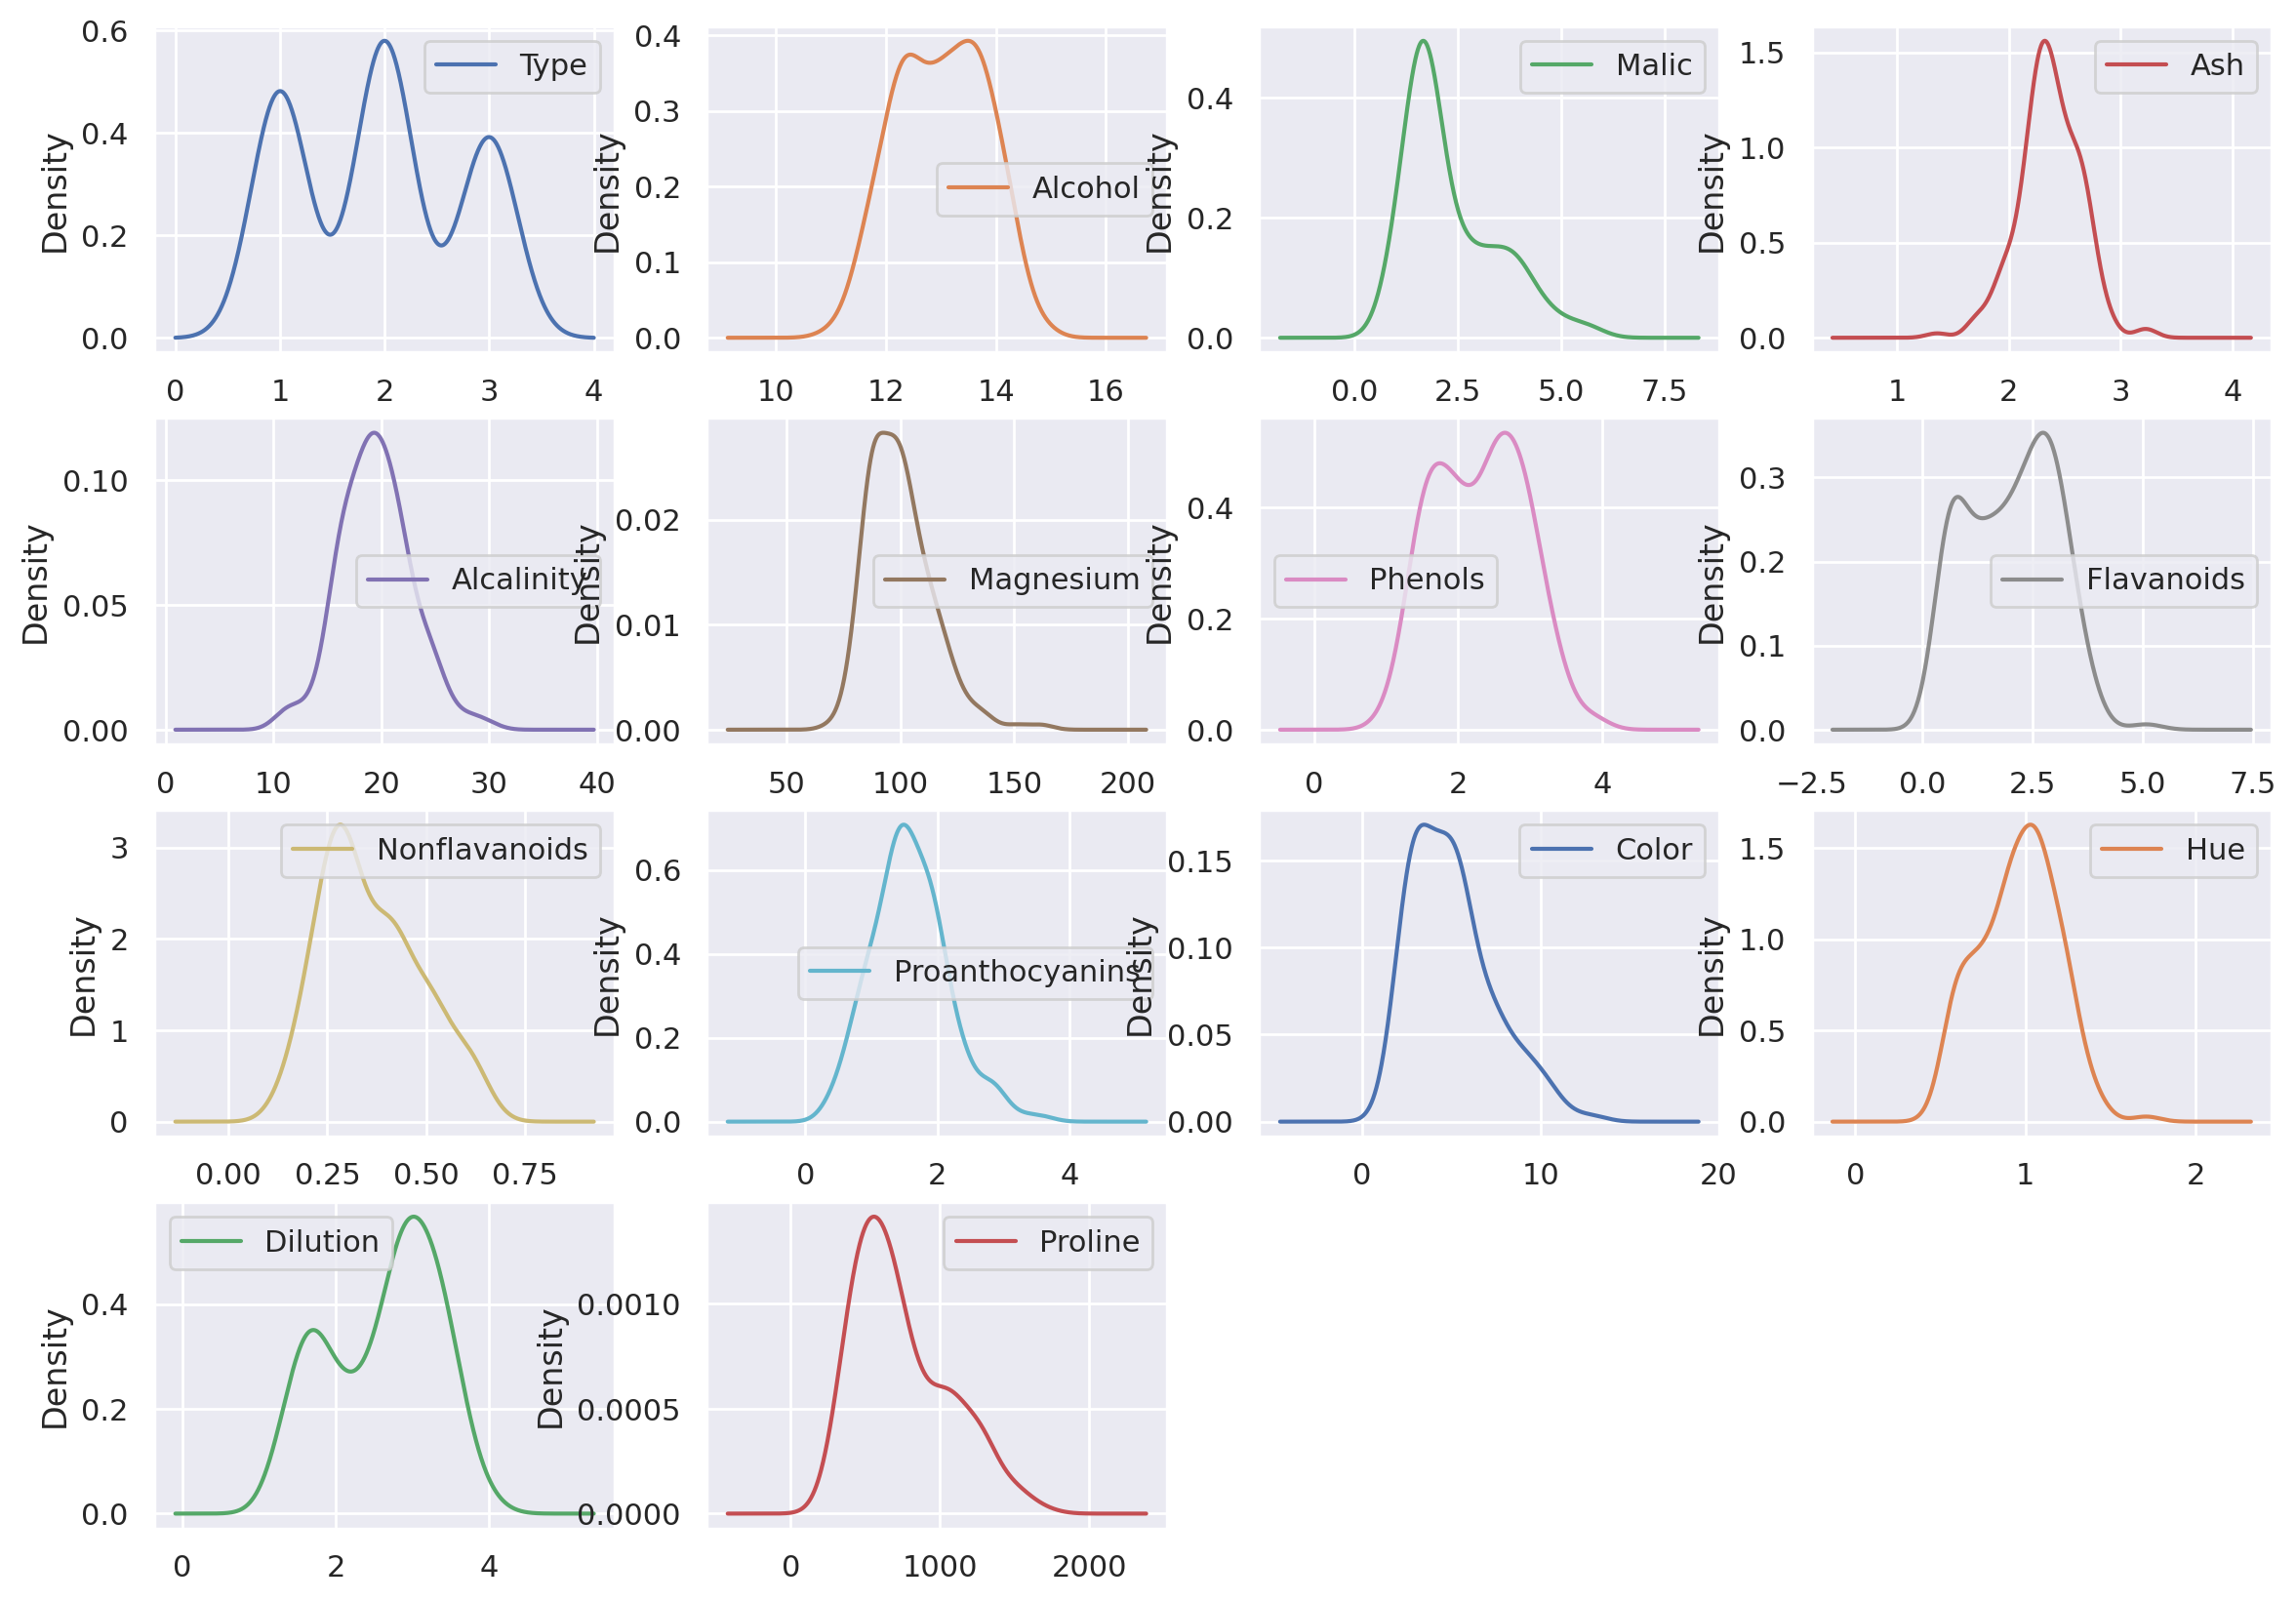

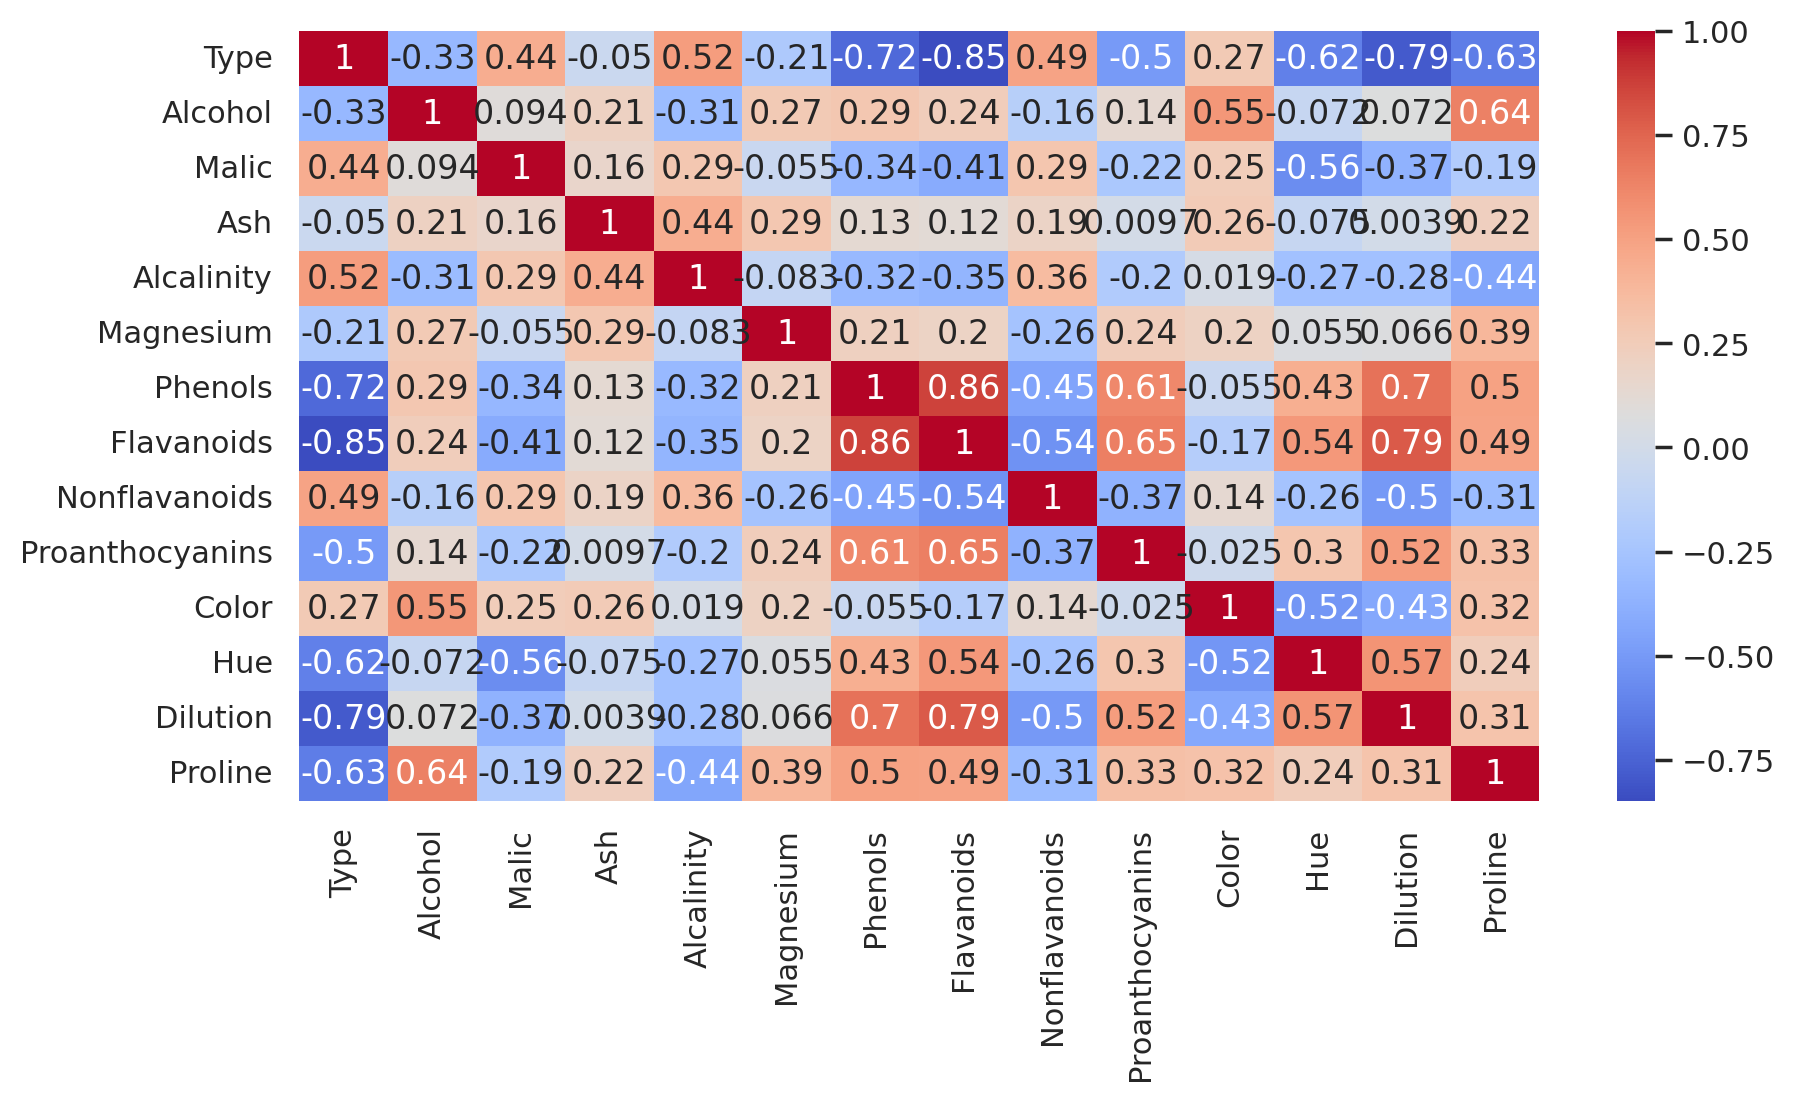

In [5]:
# Data Visualization
df.hist(figsize=(15, 12))
plt.show()

plt.figure(figsize=(14, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 10))
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Data Preprocessing
x = df.iloc[:, :-1]
y = df['Proline']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [7]:
# PCA for Dimensionality Reduction
pca = PCA()
pcs = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

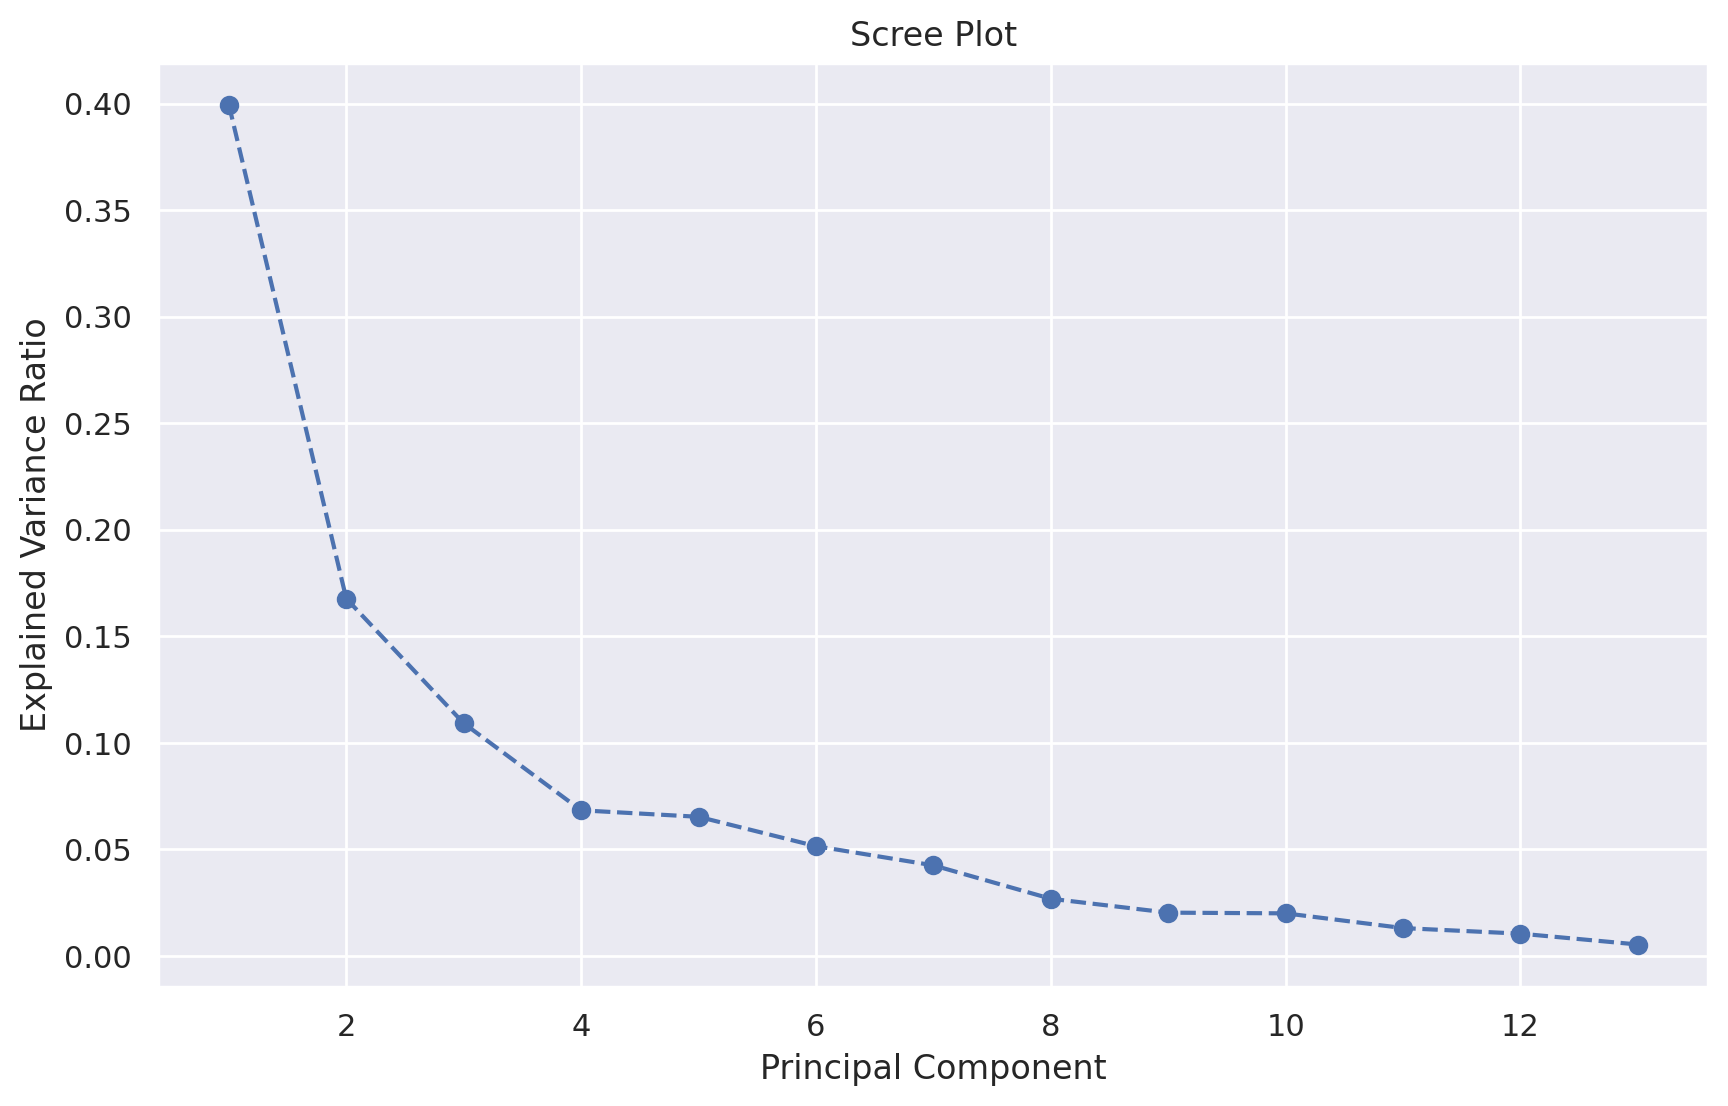

In [8]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

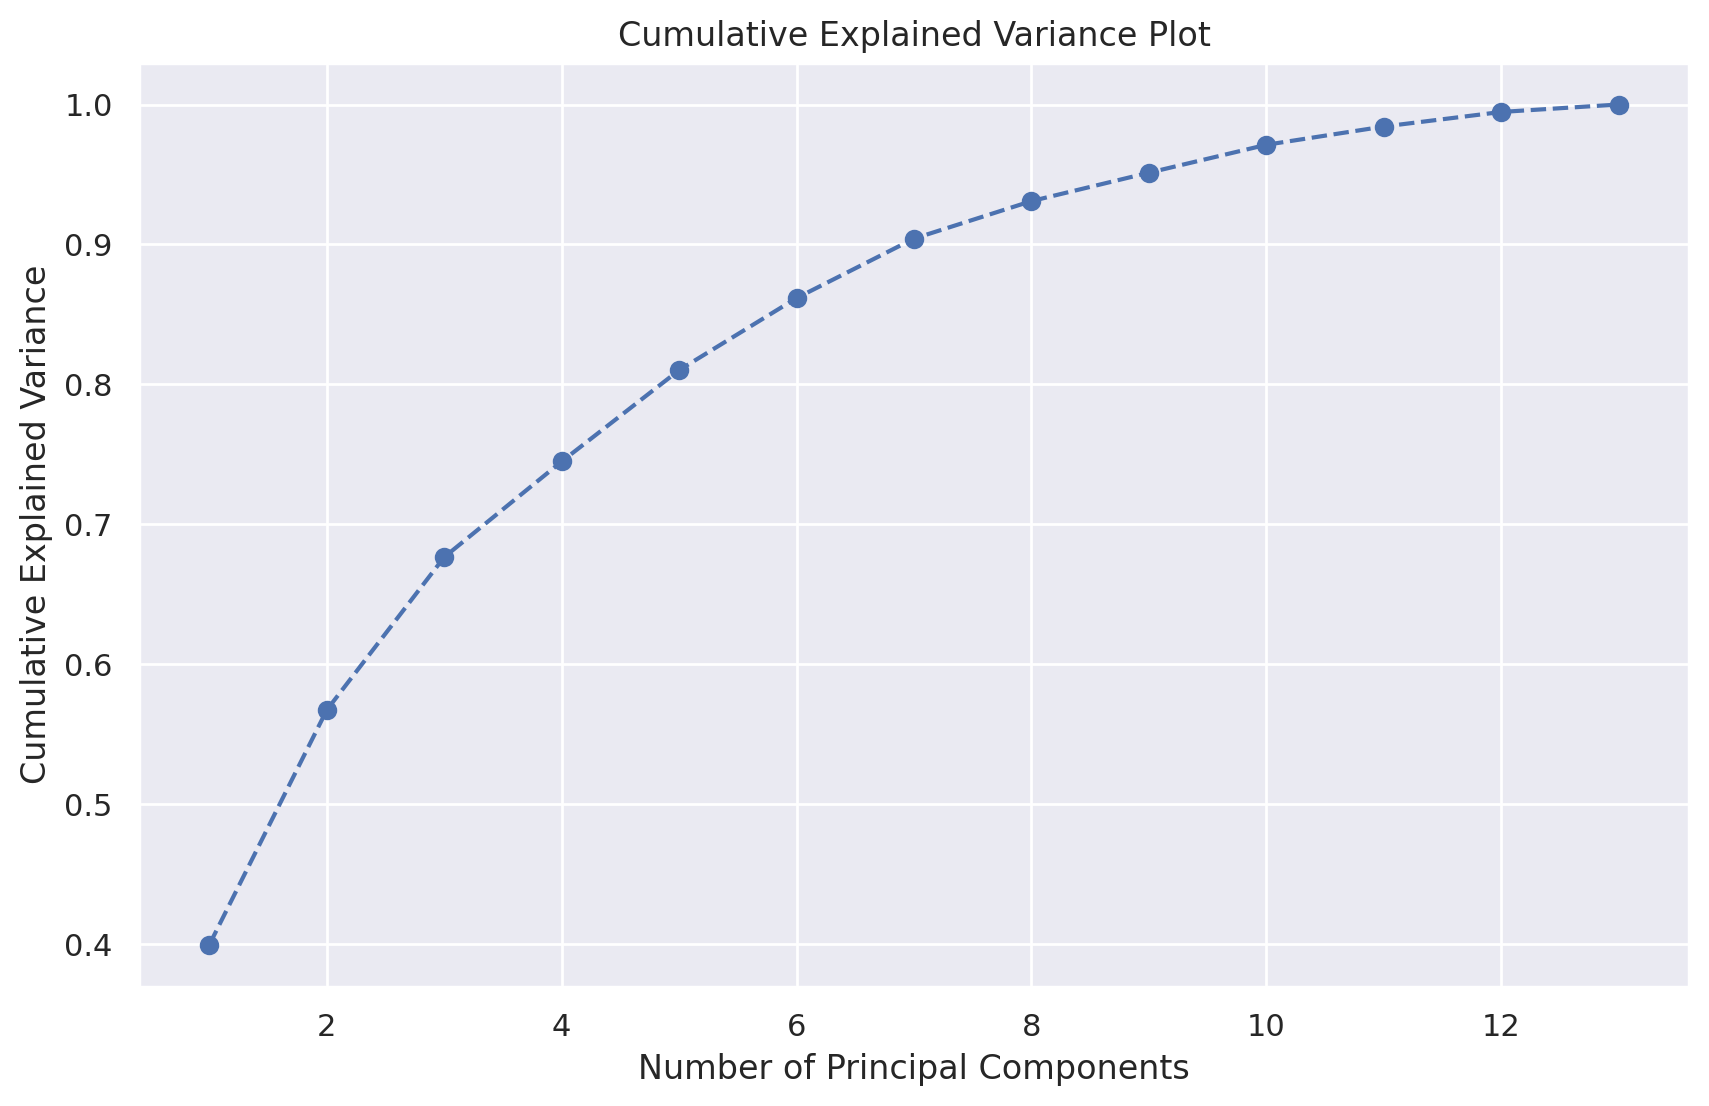

In [9]:
# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

In [10]:
# PCA with 2 Components
pca_2 = PCA(n_components=2)
pcs_2 = pca_2.fit_transform(x_scaled)

In [11]:
# DataFrame for PCA Components
pca_df = pd.DataFrame(pcs_2, columns=['PC1', 'PC2'])
pca_df['Class'] = y

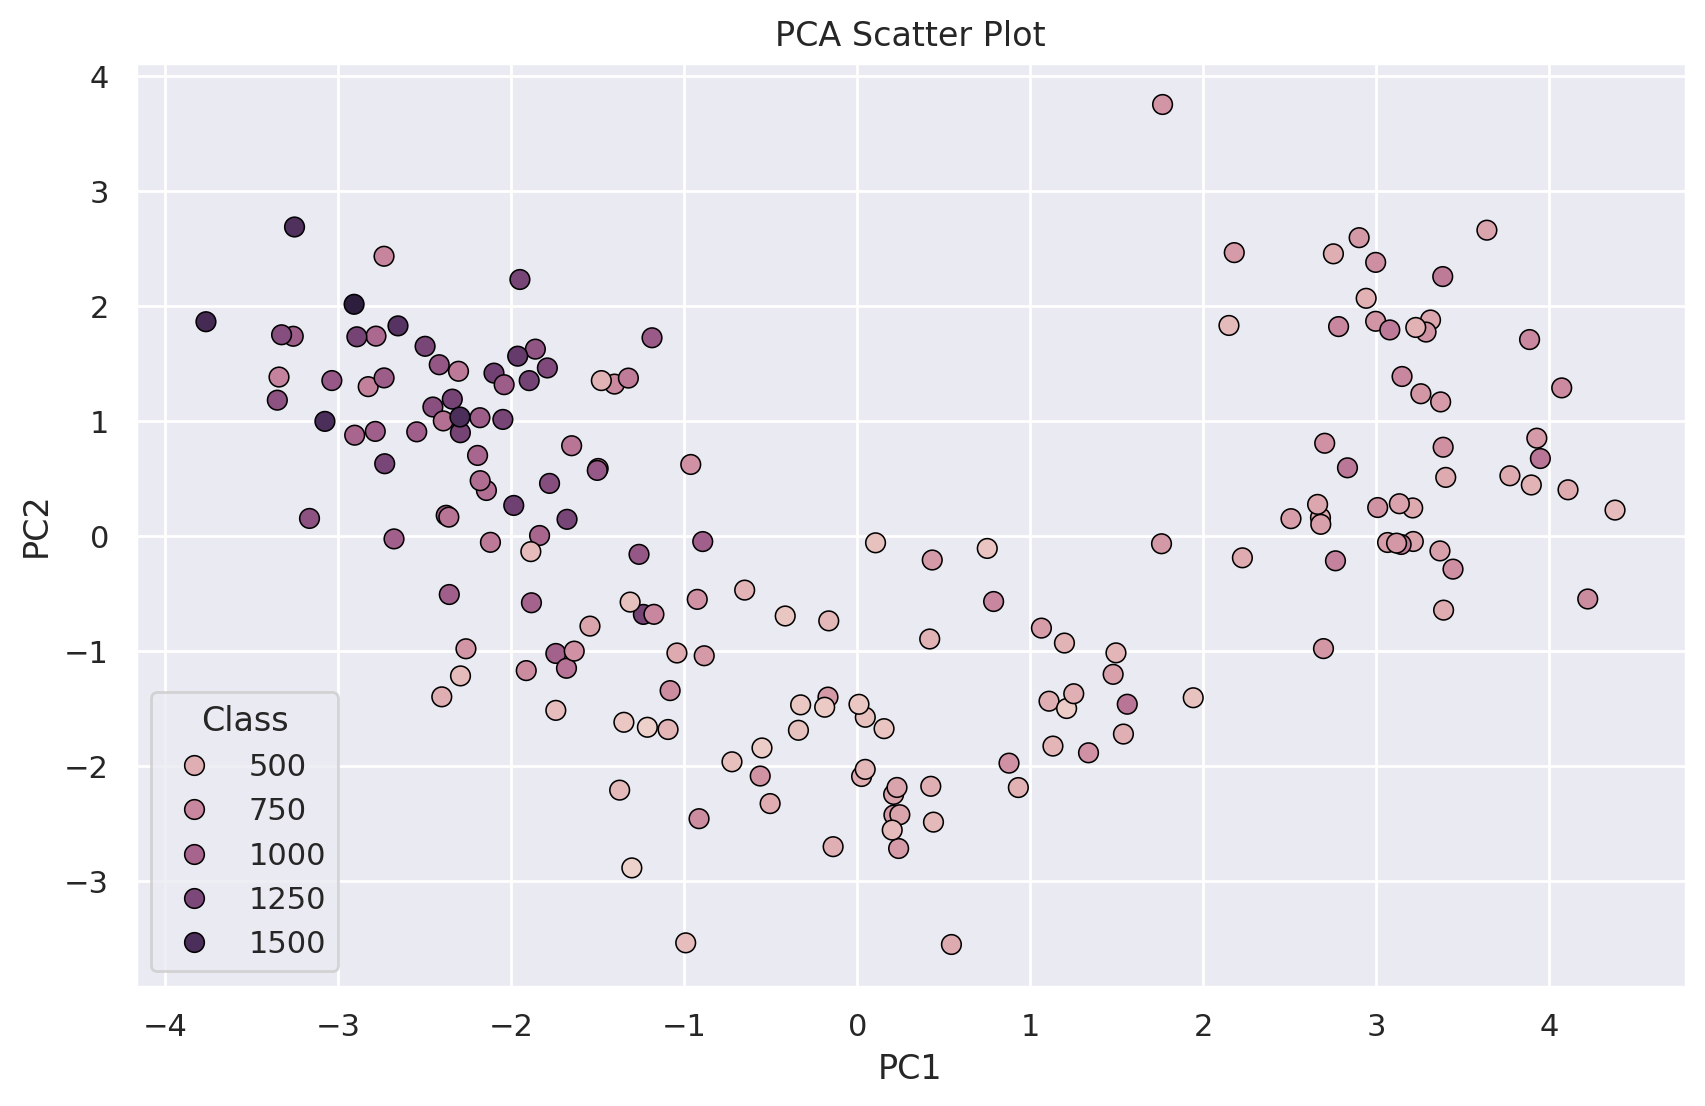

In [12]:
# Scatter Plot of PCA Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], s=50, edgecolor='black', hue=pca_df['Class'])
plt.title('PCA Scatter Plot')
plt.show()


In [13]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df['Class'], test_size=0.2, random_state=1)

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# PCA for Clustering Visualization
pca_clusters = PCA(n_components=2)
df_pca_clusters = pca_clusters.fit_transform(df.drop('Cluster', axis=1))
df_pca_clusters = pd.DataFrame(df_pca_clusters, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = df['Cluster']

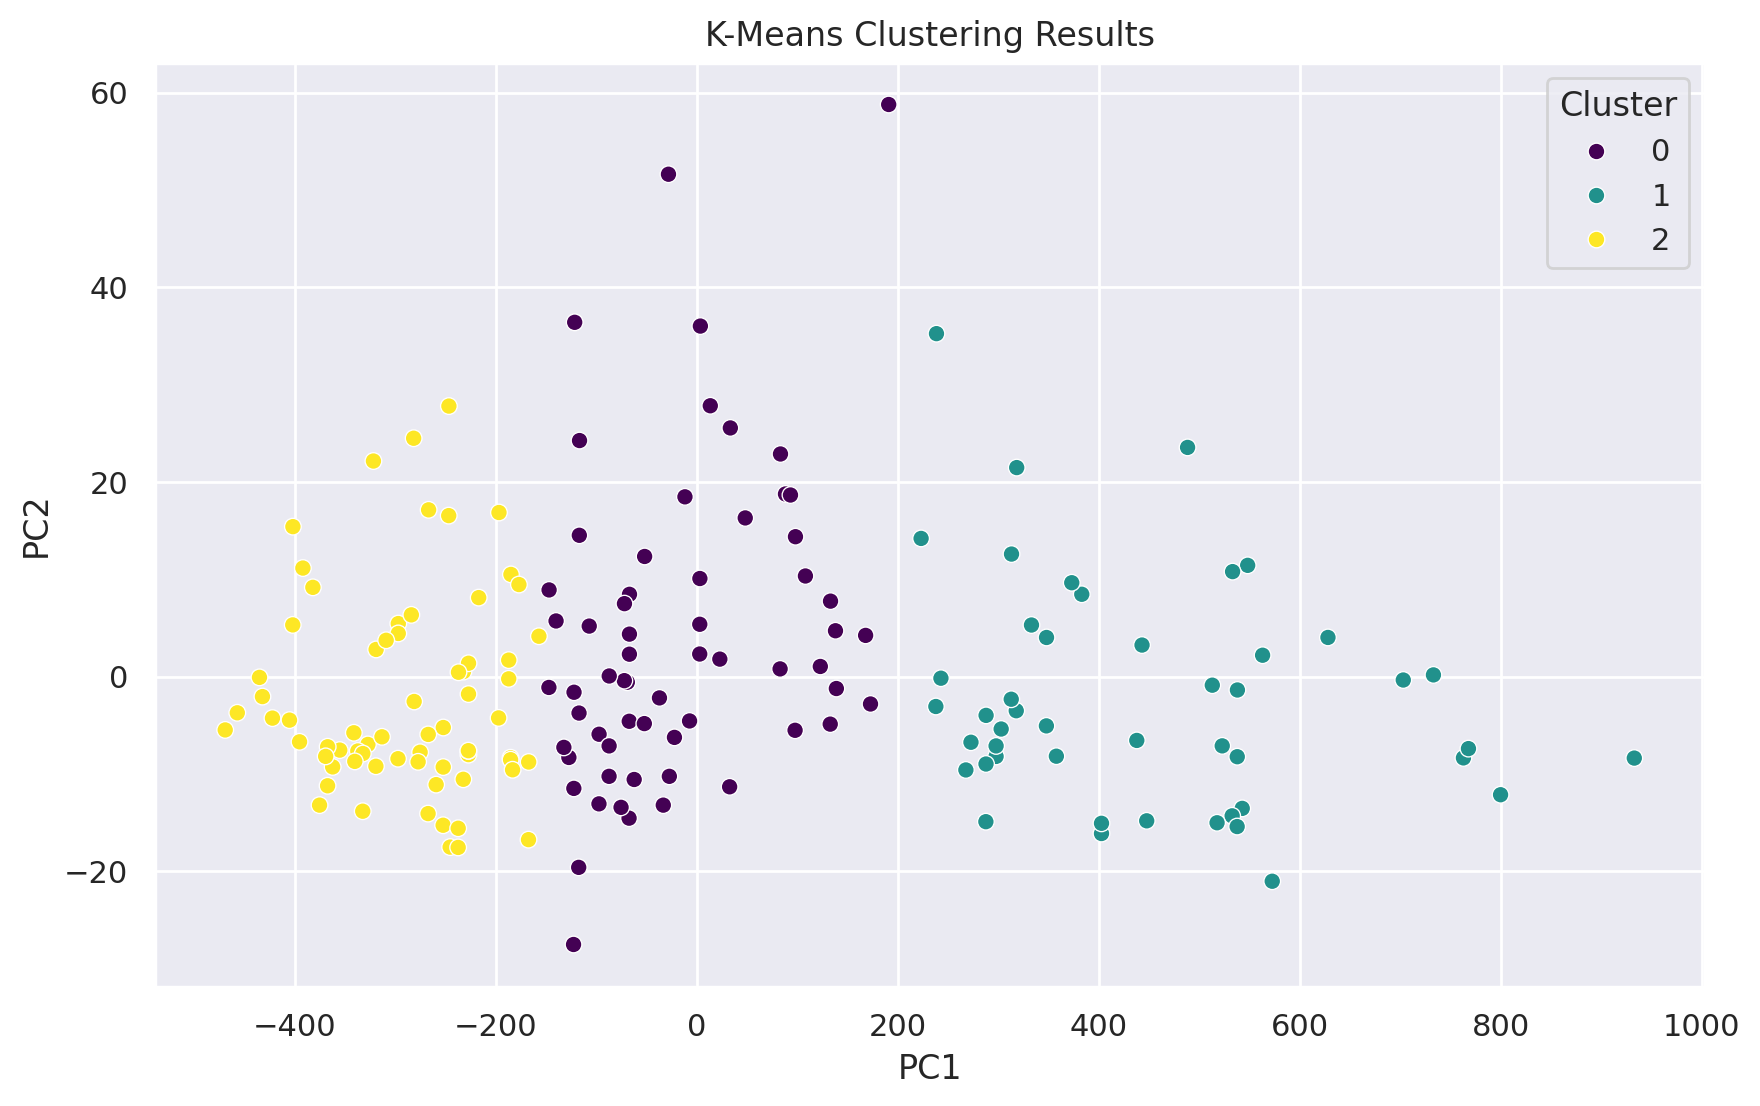

In [16]:
# Scatter Plot of K-Means Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_clusters, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()

In [17]:
# Cluster Evaluation
sil_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
db_index = davies_bouldin_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Silhouette Score (Original): {sil_score}')
print(f'Davies–Bouldin Index (Original): {db_index}')

Silhouette Score (Original): 0.5711220218931753
Davies–Bouldin Index (Original): 0.5342660703679686


In [18]:
# K-Means on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans_pca.fit_predict(pca_df.iloc[:, :-1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


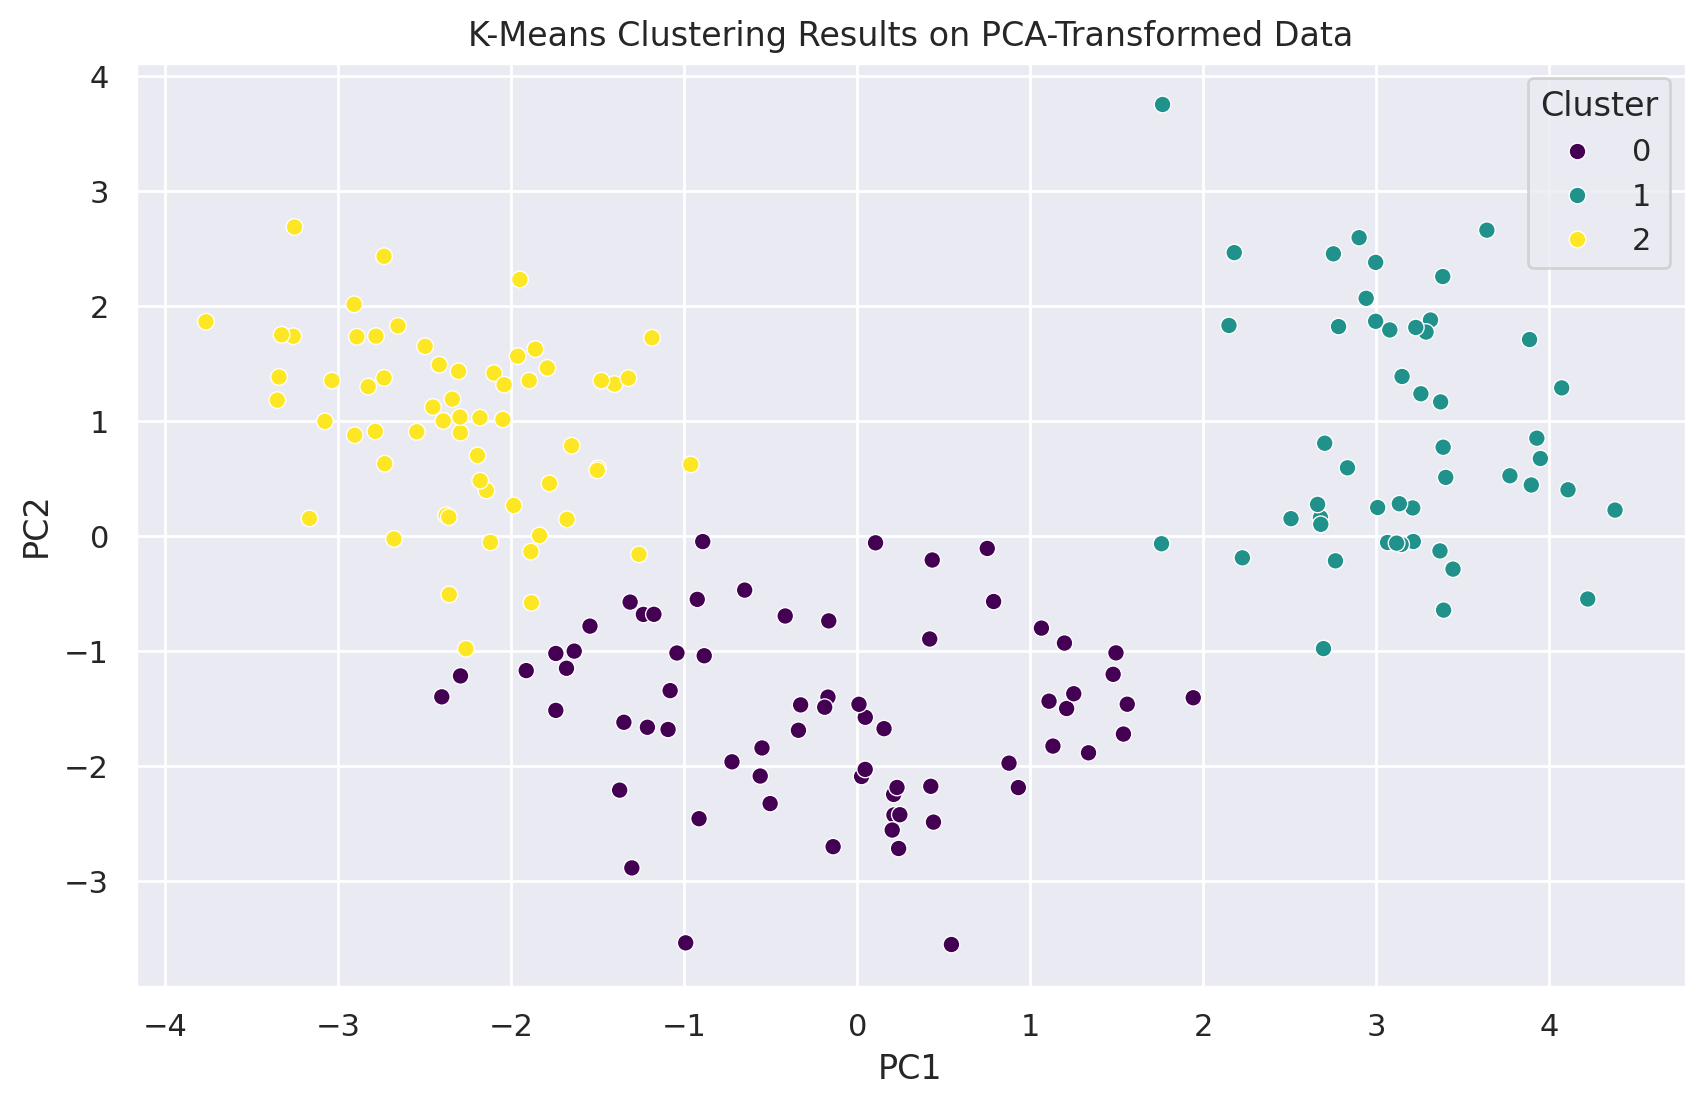

In [20]:
# Scatter Plot of K-Means Clustering on PCA-Transformed Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results on PCA-Transformed Data')
plt.show()

In [21]:
# PCA Cluster Evaluation
sil_score_pca = silhouette_score(pca_df.drop('Cluster', axis=1), pca_df['Cluster'])
db_index_pca = davies_bouldin_score(pca_df.drop('Cluster', axis=1), pca_df['Cluster'])
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')

Silhouette Score (PCA): 0.15467801863633193
Davies–Bouldin Index (PCA): 1.8700635484281822


In [22]:
# Summary of Results
print(f'Silhouette Score (Original): {sil_score}')
print(f'Davies–Bouldin Index (Original): {db_index}')
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')


Silhouette Score (Original): 0.5711220218931753
Davies–Bouldin Index (Original): 0.5342660703679686
Silhouette Score (PCA): 0.15467801863633193
Davies–Bouldin Index (PCA): 1.8700635484281822
